In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import datetime

import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

import utils

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set()

2.0.0


In [2]:
# papermill parameter cell
update_figures = True
fig_size = (8,6)
fig_ext = "pdf"


In [3]:
df_confirmed = pd.concat([
    utils.load_file(Path("/Users/aliabbasjaffri/Documents/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"))
])

df_deaths = pd.concat([
    utils.load_file(Path("/Users/aliabbasjaffri/Documents/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"))
])

df_recovered = pd.concat([
    utils.load_file(Path("/Users/aliabbasjaffri/Documents/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"))
])



In [4]:
def get_figures_by_country(df_val, country):
    df = df_val[df_val['Country'] == country]
    
    df = df.melt(id_vars=['Country', 'Province'],
                 var_name="Date", 
                 value_name="Confirmed")
    
    df.dropna(axis=1, how='all', inplace=True)
    df['Date'] = pd.to_datetime(df.Date)
    df['Date'] = df['Date'].values.astype(float)
    df["Confirmed"] = df["Confirmed"].astype(int)
    return df

In [5]:
# def separate_provincial_information(df):
#     withoutPD = df.query('(Province.isnull())')
#     withPD = df.query('(not Province.isnull())')
    
#     withoutPD = withoutPD.pivot(index='Date', columns='Country')['Confirmed']
    
#     withPD = withPD.pivot_table(index=['Date', 'Country'], columns='Province', values='Confirmed').unstack('Country').reset_index()
#     withPD = withPD.dropna(axis=1, how='all')
#     return withoutPD, withPD

In [6]:
# countries = ['Pakistan', 'Germany', 'Iran', 'Italy', 'India', 'China', 'Australia'] 
countries = ['Pakistan']

country_data_confirmed = []
country_data_deaths = []
country_data_recovered = []

for country in countries:
    country_data_confirmed.append(get_figures_by_country(df_confirmed, country))
    country_data_deaths.append(get_figures_by_country(df_deaths, country))
    country_data_recovered.append(get_figures_by_country(df_recovered, country))

df_confirm = pd.concat(country_data_confirmed)
df_death = pd.concat(country_data_deaths)
df_recover = pd.concat(country_data_recovered)

df_confirm



,Country,Date,Confirmed
0,Pakistan,1.579651e+18,0
1,Pakistan,1.579738e+18,0
2,Pakistan,1.579824e+18,0
3,Pakistan,1.579910e+18,0
4,Pakistan,1.579997e+18,0
...,...,...,...
62,Pakistan,1.585008e+18,972
63,Pakistan,1.585094e+18,1063
64,Pakistan,1.585181e+18,1201
65,Pakistan,1.585267e+18,1373


In [21]:
df_confirm_new = df_confirm[df_confirm["Confirmed"] > 0]
df_confirm_new.reset_index(drop=True, inplace=True)
df_confirm_new

,Country,Date,Confirmed
0,Pakistan,1.582675e+18,2
1,Pakistan,1.582762e+18,2
2,Pakistan,1.582848e+18,2
3,Pakistan,1.582934e+18,4
4,Pakistan,1.583021e+18,4
5,Pakistan,1.583107e+18,4
6,Pakistan,1.583194e+18,5
7,Pakistan,1.583280e+18,5
8,Pakistan,1.583366e+18,5
9,Pakistan,1.583453e+18,6


In [22]:
# withoutPD_confirm, withPD_confirm = separate_provincial_information(df_confirm)
# withoutPD_death, withPD_death = separate_provincial_information(df_death)
# withoutPD_recover, withPD_recover = separate_provincial_information(df_recover)


In [23]:
# count_confirm = withoutPD_confirm[["Pakistan", "India"]]
# count_death = withoutPD_death[["Pakistan", "India"]]


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

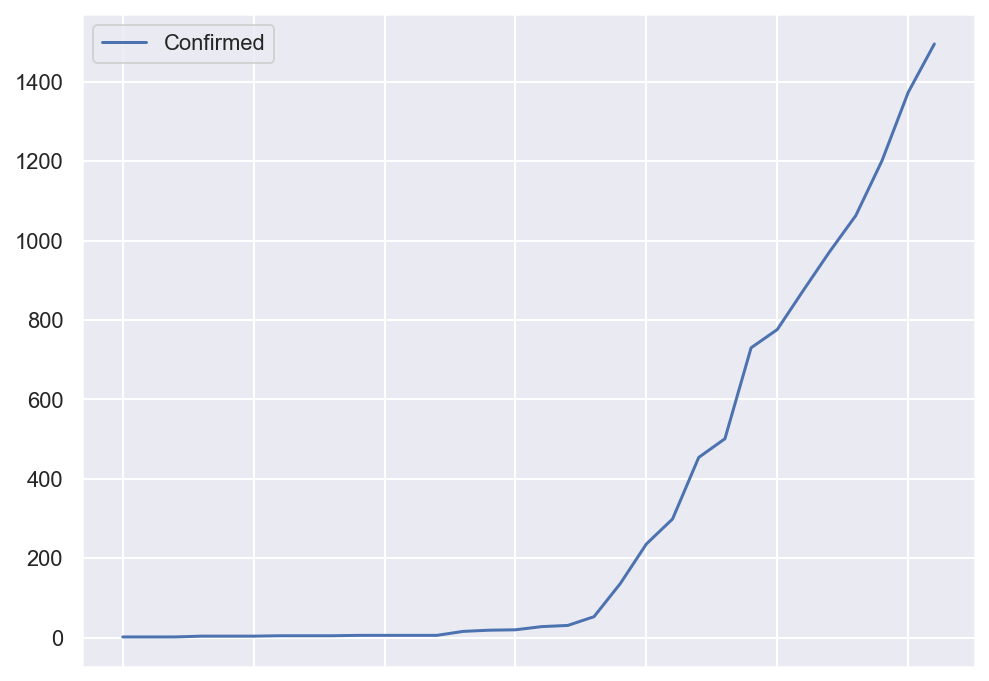

In [24]:
plt.figure(figsize=fig_size)


chart = sns.lineplot(data=df_confirm_new[["Confirmed"]])
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45
)


# update_figures and chart.savefig(f"../plots/local-single-node/ext4/imagenet_200k/small-image-files/imagenet_throughput.{fig_ext}", bbox_inches="tight");

In [25]:
# plt.figure(figsize=fig_size)

# chart = sns.lineplot(data=count_death)
# chart.set_xticklabels(
#     chart.get_xticklabels(), 
#     rotation=45
# )


# # update_figures and chart.savefig(f"../plots/local-single-node/ext4/imagenet_200k/small-image-files/imagenet_throughput.{fig_ext}", bbox_inches="tight");

In [26]:
X = df_confirm_new[["Date"]]
Y = df_confirm_new[["Confirmed"]]
X.reset_index(drop=True, inplace=True)
Y.reset_index(drop=True, inplace=True)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

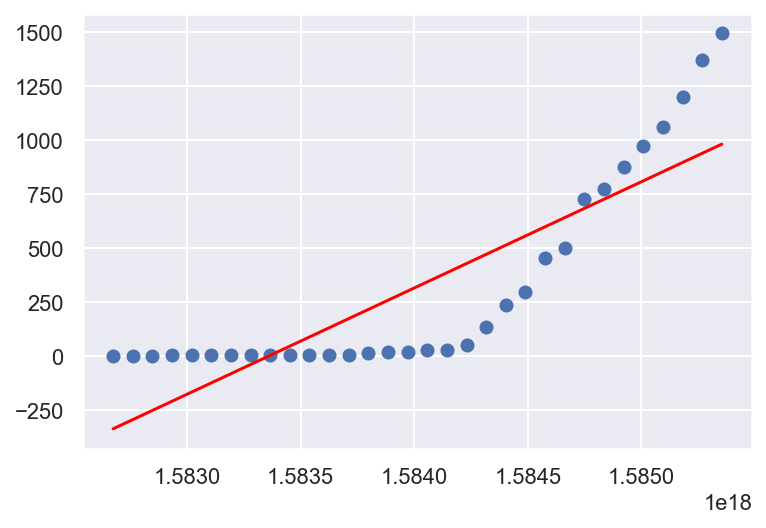

In [27]:
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [31]:
prediction_dates = []

sdate = datetime.datetime(2020, 3, 29)   # start date
edate = datetime.datetime(2020, 3, 30)   # end date

delta = edate - sdate       # as timedelta
epoch = datetime.datetime.utcfromtimestamp(0)

for i in range(delta.days + 1):
    day = sdate + datetime.timedelta(days=i)
#     temp_date = (day - epoch).total_seconds() * 1000.0
    prediction_dates.append(day)
    
prediction_dates
pred_data = pd.DataFrame(data=prediction_dates)


pred_data[0] = pd.to_datetime(pred_data[0])
pred_data[0] = pred_data[0].values.astype(float)
pred_data

2020-03-29 00:00:00


,0
0,1.585440e+18
1,1.585526e+18
2,1.585613e+18


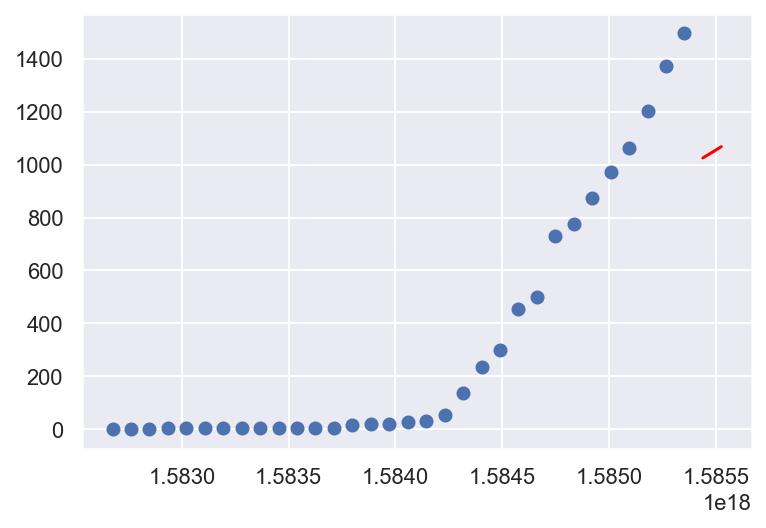

In [29]:
Y_pred = linear_regressor.predict(pred_data)  # make predictions
plt.scatter(X, Y)
plt.plot(pred_data, Y_pred, color='red')
plt.show()

In [16]:
Y_pred

array([[1024.92943548],
       [1067.47250733]])